In [1]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import random
np.set_printoptions(threshold=np.nan)
from Strawry.env import Env 
env = Env()

In [2]:
env.set_target(temp=10,humi=80,co2=350,light=0,watp=0)



440

Score over time: 83.28


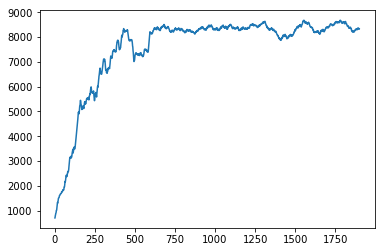

In [3]:
Q= np.zeros((env.n_state, env.n_action))
y = 0.99
lr = 0.25

num_episodes = 2000

# list thats going to be used in the future
memo = []
rList = []
ex = []
why = []
alpha=np.log(0.1)/num_episodes      # decay learning rate
for i in range(num_episodes):
    lr= np.exp(alpha*i)  #decay learning rate
    s = env.reset( temp=np.random.randint(low=10,high=21, size=1),
                                          humi=np.random.randint(low=10,high=100, size=1),
                                          co2=350,
                                          light=np.random.randint(low=0,high=1, size=1),
                                          watp=np.random.randint(low=0,high=1, size=1)
                                            )
    rAll = 0
    done=False
  
    while done==False:               #random action to get next state and action
        if np.random.rand() < lr*0.01:
            a = np.random.randint(env.n_action)
        else:
            a = np.argmax(Q[s,:] )
        s1,reward,done,_ = env.step(a)
        
        if done:
            r = 1 if reward > 0.0 else -0.1
        else:
            r =-0.00001
        #Update Q-Table with new knowledge
        Q[s,a] = Q[s,a] +  lr*(r + y*np.max(Q[s1,:]) - Q[s,a])

        rAll += reward
        s = s1
        if i==1999:
            ex.append(env.temp[0])
            why.append(env.humi[0])
            
        if done == True:
            break
    if np.random.choice([True, False], p=[0.6, 0.4]) and len(memo) > 0:
        idx = np.random.choice(len(memo))
        pQ = memo[idx]
        Q = 0.1*pQ + 0.9*Q
    
    
    rList.append(rAll)
    memo.append(Q)
    

    
print ("Score over time: " +  str(sum(rList[-100:])/100.0))
plt.plot(np.convolve(np.ones(100),rList,"valid"))



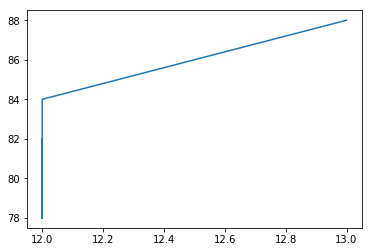

In [4]:
plt.plot(ex,why)

In [5]:
np.exp(1, 2)

TypeError: return arrays must be of ArrayType

In [ ]:
print(Q)

In [ ]:
print(rAll)